In [10]:
import numpy as np
import pandas as pd
import ast
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy import stats
import scipy

In [11]:
df = pd.read_csv("VR_Participants - Co-Presence.csv", delimiter=",")

In [12]:
df = df.dropna()

In [13]:
questions = range(1,19)

for c in questions:
    df[str(c)] = df[str(c)].apply(lambda x: x + 4)

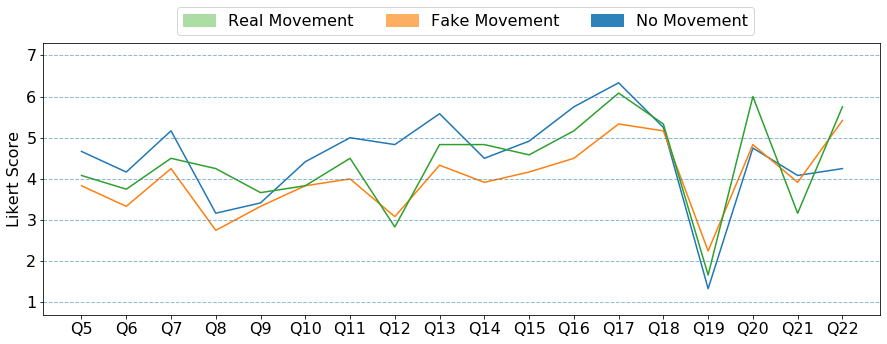

In [15]:
fig, ax = plt.subplots(1,figsize = (15,5))

plt.rcParams.update({'font.size': 16})

question_labels = ['Real Movement', 'Fake Movement', 'No Movement']
colors = ['#abdda4','#fdae61','#2b83ba','#d7191c']


patches = []
for i in range(len(question_labels)):
    patch = mpatches.Patch(color=colors[i], label=question_labels[i])
    patches.append(patch)
    
for y,c in enumerate(df.condition.unique()):
    df_temp = df[(df.condition == c)]
    tmp = []
    for i,q in enumerate(questions):
        #print(df_temp[str(q)].mean())
        tmp.append(df_temp[str(q)].mean())
    ax.plot(questions,tmp, label=c)
#fig.legend()
#plt.xticks(questions)
ax.set_ylabel("Likert Score")
plt.legend(handles = patches,ncol = 3, bbox_to_anchor=(0.15, 1))
plt.xticks(range(1,19), ["Q5", "Q6", "Q7", "Q8", "Q9", "Q10", "Q11", "Q12", "Q13", "Q14", "Q15", "Q16", "Q17", "Q18", "Q19", "Q20", "Q21", "Q22"])

for i in range(1,8):
    ax.axhline(y=i, xmin=0, xmax=21, linestyle = "--", alpha = 0.5,linewidth = 1, label=False)

plt.savefig("co-presence.pdf", bbox_inches="tight")
plt.savefig("co-presence.svg", bbox_inches="tight")
plt.show()